# Guided Project: Finding the Best Markets to Advertise In

In this project, we will be working for an e-learning company that teaches, to investigate the best markets to advertise in.  Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

To reach this goal, data was retrieved from [freeCodeCamp](https://www.freecodecamp.org/) a free e-learning platform that offers courses on web development. Their 2017 survey attracted over 20000 new coders with varying interest in not only web development. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.shape

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



(18175, 136)

In [35]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The respondents are considered new coders at the time as they all strted to learn coding withing 21 months from the survey. This data can be downloaded from [freeCodeCamp Github](https://github.com/freeCodeCamp/2017-new-coder-survey). 


### Checking for Sample Representativity 

As we mentioned in the introduction, most of our courses are on web development, but we also interested in other domains like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach.

Hence lets start by looking at the JobRoleInterest column to see if this data is a good representative for our research interest.


In [36]:
a =survey['JobRoleInterest'].value_counts(normalize = True).sort_values(ascending = False) * 100
a

Full-Stack Web Developer                                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                      

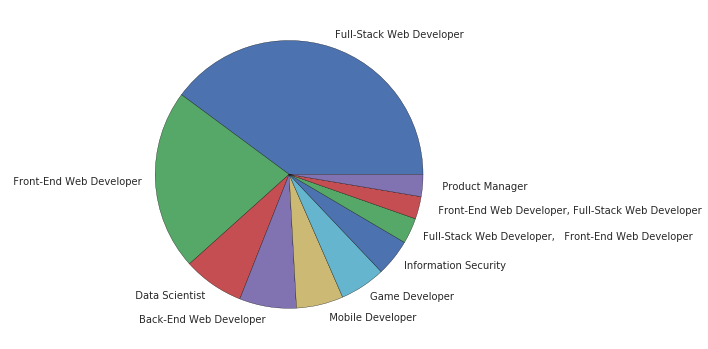

In [37]:
a.head(10).plot.pie(figsize = (6,6))
plt.ylabel('')
plt.show()

From the frequency table above, it is clear that respondents are interested in different areas of programming, the pie chart shows the top 10 domain of interest. Hence this sample data is a good fit to answer our question. 

### Understanding participants demographics (potential markets) 

The countryLive column contains demographic data for participants, lets look at that. 
To make sure you're working with a representative sample, we will drop all the rows where participants didn't answer what role they are interested in.

In [38]:
df =survey.dropna(axis=0, subset=['JobRoleInterest']) 

In [39]:
df.shape

(6992, 136)

In [40]:
df['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

The two main markets from the frequency table above are the US and Indian. However, there is much more than just these numbers, lets look deeper.

### Money spent on learning

Money spent by participants is important, as we want to advertise to potential customers that are willing to pay for our services. Lets investigate money spent monthly for learning how to code. We will only be focusing on the tope 4 countries. US, India, Uk and Canada.

In [41]:
#replacing o months with 1 month to calculate money spent
df['MonthsProgramming'].replace(0,1, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [42]:
# to convert cost to montly time frame we divide total costs by months of programming
df['learning_cost_monthly'] = df['MoneyForLearning'] / df['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [43]:
df['learning_cost_monthly'].isna().sum()

675

In [44]:
# rows with missing values for monthly cost
df =df.dropna(axis=0, subset=['learning_cost_monthly']) 

In [45]:
#remove rows with missing values for CountryLive
df.dropna(axis = 0, subset = ['CountryLive'], inplace = True)

In [46]:
# Select the 4 countries of interest
top_markets = df[df["CountryLive"].isin(['United States of America', 'United Kingdom', 'Canada', 'India'])]

In [47]:
print('mean monthly cost of learning by country')
b = top_markets.groupby('CountryLive').mean()
b['learning_cost_monthly'].sort_values(ascending =False)


mean monthly cost of learning by country


CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: learning_cost_monthly, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. lets use a plot to investigate further

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



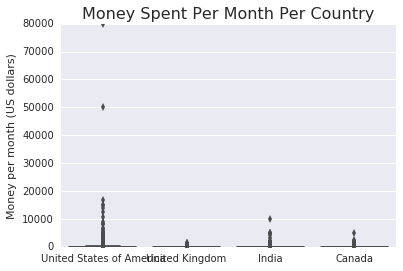

In [48]:
import seaborn as sns
sns.boxplot(y = 'learning_cost_monthly', x = 'CountryLive',
            data = top_markets)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('')
plt.show()

Well, there are no extreme outliers in India, Uk or Canada suggesting these high values. **But lets clear the dataset of outliers and recompute the mean again.**

In [49]:
# elimate amounts higher than 20000 monthly
top_markets = top_markets[top_markets['learning_cost_monthly'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



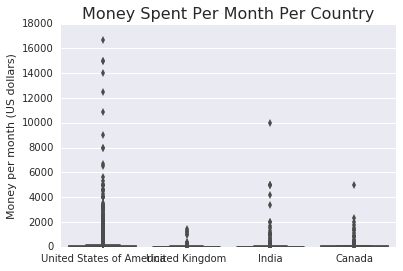

In [50]:
sns.boxplot(y = 'learning_cost_monthly', x = 'CountryLive',
            data = top_markets)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('')
plt.show()

In [51]:
print('mean monthly cost of learning by country')
c = top_markets.groupby('CountryLive').mean()
c['learning_cost_monthly'].sort_values(ascending =False)

mean monthly cost of learning by country


CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: learning_cost_monthly, dtype: float64

There are still several outliers, lets see if we could explain such high prises for learning

In [52]:
# Inspect the extreme outliers for India
india_outliers = top_markets[
    (top_markets['CountryLive'] == 'India') & 
    (top_markets['learning_cost_monthly'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,learning_cost_monthly
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


We could see that not of these participants attended a bootcamp. There is no explanation for the high number we can safely regard them as false entry. 

In [53]:
# Delete the outliers for India
top_markets = top_markets.drop(india_outliers.index) # using the row labels

In [54]:
# Examine the extreme outliers for the US
us_outliers = top_markets[
    (top_markets['CountryLive'] == 'United States of America') & 
    (top_markets['learning_cost_monthly'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,learning_cost_monthly
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


8 out of the 11 US respondents attended a bootcamp, which means they might have spent that much, however some have only been  programming for 1 or months indicating that the just started and paid for a year several years or months. Hence the monthly cost may not be accurate in this regard. Lets clear them out as outliers.

In [56]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = top_markets[
    (top_markets['CountryLive'] == 'United States of America') & 
    (top_markets['learning_cost_monthly'] >= 6000) &
    (top_markets['AttendedBootcamp'] == 0)
]
top_markets = top_markets.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = top_markets[
    (top_markets['CountryLive'] == 'United States of America') & 
    (top_markets['learning_cost_monthly'] >= 6000) &
    (top_markets['MonthsProgramming'] <= 3)
]
top_markets = top_markets.drop(less_than_3_months.index)

In [57]:
# Examine the extreme outliers for Canada
canada_outliers = top_markets[
    (top_markets['CountryLive'] == 'Canada') & 
    (top_markets['learning_cost_monthly'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,learning_cost_monthly
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Just like in the US,this respondent attended a bootcamp, however the person has not been codeing for 2 months. Hence just like above we remove this entry

In [61]:
top_markets = top_markets.drop(canada_outliers.index)

** Now lets check the mean again**

In [62]:
print('mean monthly cost of learning by country')
d = top_markets.groupby('CountryLive').mean()
d['learning_cost_monthly'].sort_values(ascending =False)

mean monthly cost of learning by country


CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: learning_cost_monthly, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



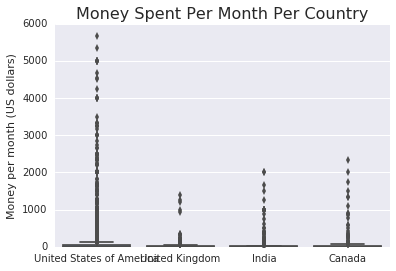

In [66]:
sns.boxplot(y = 'learning_cost_monthly', x = 'CountryLive',
            data = top_markets)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('')
plt.show()

This is a more representative data of learning costs. And the US and Canada, are the top two markets to advertise in. However I will highly recommend India Considering GDP and dollars worth in this economy, yet they pay even higher than the Uk to learn coding.

In [68]:
top_markets['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

In explicit dollar sums, Canada would be a second market, however in relative terms as pointed by the frequency table above. India should be the second market after the US. 

Yet I will advise a budget split that should include US, Canada and India as potential advertising markets.

### Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.